In [2]:
library(Seurat)
library(org.Hs.eg.db)
library(clusterProfiler)
library(patchwork)
library(dplyr)
library(RColorBrewer)
library(ggplot2)
library(cowplot)
library(ggpubr)
library(readr)
library(tidyr)
library(ggforce)
library(pals)
library(pheatmap)
library(scales)
library(ggthemes)
library(clustree)
library(ComplexHeatmap)
library(circlize)
library(ggrastr)
library(ggrepel)
library(viridis)
library(tibble)
library(igraph)

In [69]:
setwd("/mnt/public3/chaohy/pancancer/sfig/")

In [3]:
rds <- readRDS("/mnt/public3/chaohy/pancancer/fig2/CellRes.GSE205013_CCA_ref_20240109.int.rds")

In [15]:
colors_jo <- read.table("/mnt/public3/chaohy/pancancer/plot1cell/colors_jo.txt", sep="\t", header=T,comment.char = "")

colors_jo$primary_cluster <- factor(colors_jo$primary_cluster,levels = unique(colors_jo$primary_cluster))
markers_color = setNames(unique(colors_jo$primary_color), names(table(colors_jo$primary_cluster)))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



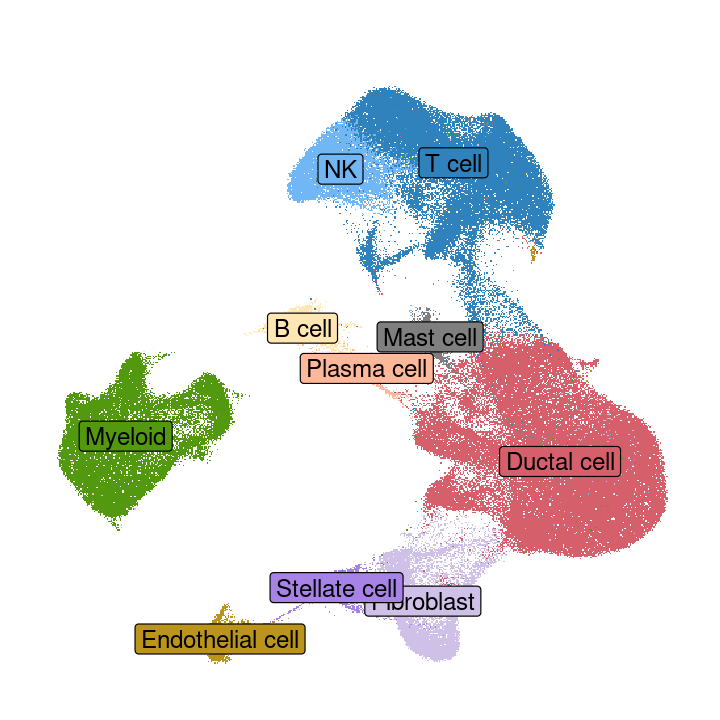

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



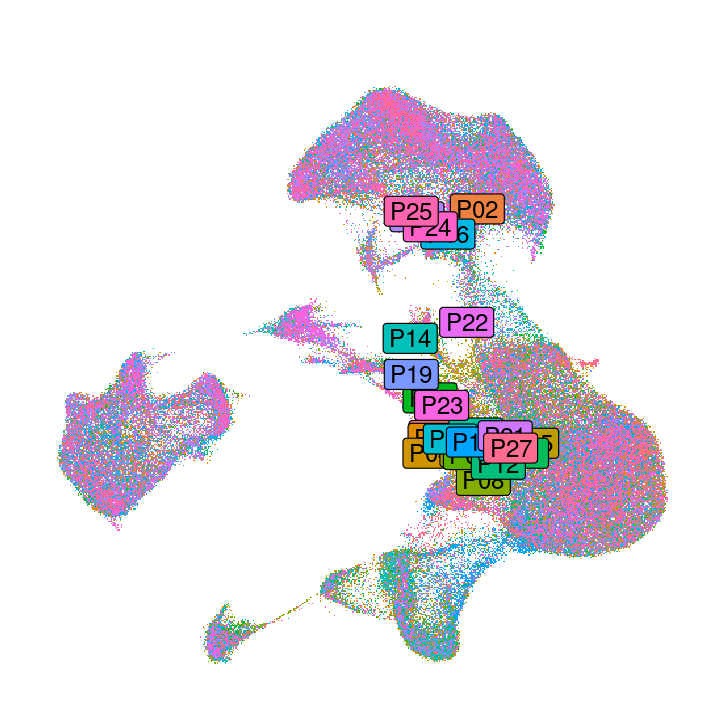

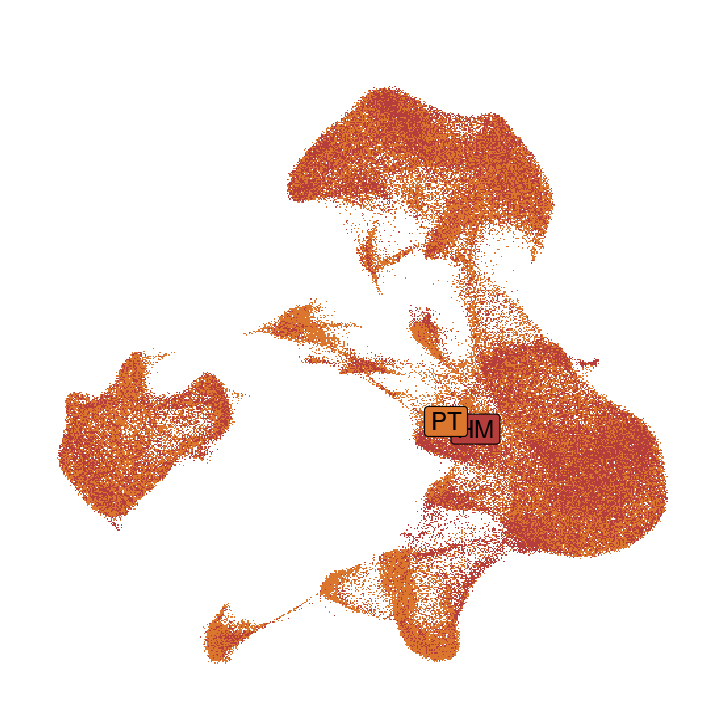

In [46]:
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(rds, label=T, label.box=T,label.size = 5, group.by ="primary_cluster",cols = markers_color) + NoLegend() +
theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), axis.title = element_blank())+
labs(title = "")+ theme(plot.title = element_text(hjust = 0.5,size = 15,face="bold" )) -> p1
p1

DimPlot(rds, label=T, label.box=T,label.size = 5, group.by ="orig.ident") + NoLegend() +
theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), axis.title = element_blank())+
labs(title = "")+ theme(plot.title = element_text(hjust = 0.5,size = 15,face="bold" )) -> p2
p2

DimPlot(rds, label=T, label.box=T,label.size = 5, group.by ="Course",cols = c("#B53D3B","#DA762E")) + NoLegend() +
theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), axis.title = element_blank())+
labs(title = "")+ theme(plot.title = element_text(hjust = 0.5,size = 15,face="bold" )) -> p3
p3

In [7]:
rdsjo <- readRDS("/mnt/public3/chaohy/pancancer/plot1cell/20240103_Integ.final_UMAP_Clean.rds")
rdsjo_meta <- readRDS("/mnt/public3/chaohy/pancancer/plot1cell/20240107_Integ.final.metadata.rds")
rdsjo@meta.data <- rdsjo_meta

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



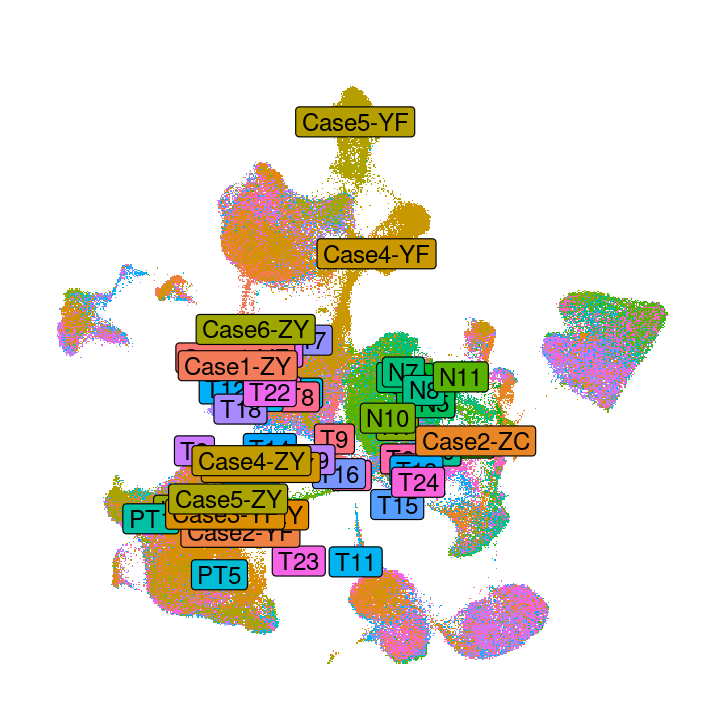

In [47]:
DimPlot(rdsjo, label=T, label.box=T,label.size = 5, group.by ="orig.ident") + NoLegend() +
theme(axis.line = element_blank(), axis.text = element_blank(), axis.ticks = element_blank(), axis.title = element_blank())+
labs(title = "")+ theme(plot.title = element_text(hjust = 0.5,size = 15,face="bold" )) -> p4
p4

In [48]:
rdsjo@meta.data$markers %>% unique() %>% as.data.frame() -> markers
DotPlot(rds, features=markers$".",group.by = "primary_cluster") + RotatedAxis()+ scale_color_gradientn(colours=rev(brewer.rdylbu(20)), guide = "colourbar") -> p5

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [62]:
( p2 + p4 + p3) + plot_layout(ncol = 3) -> p6
p1 + p5 + plot_layout(ncol = 2,widths = c(1, 2)) -> p7

png 
  2

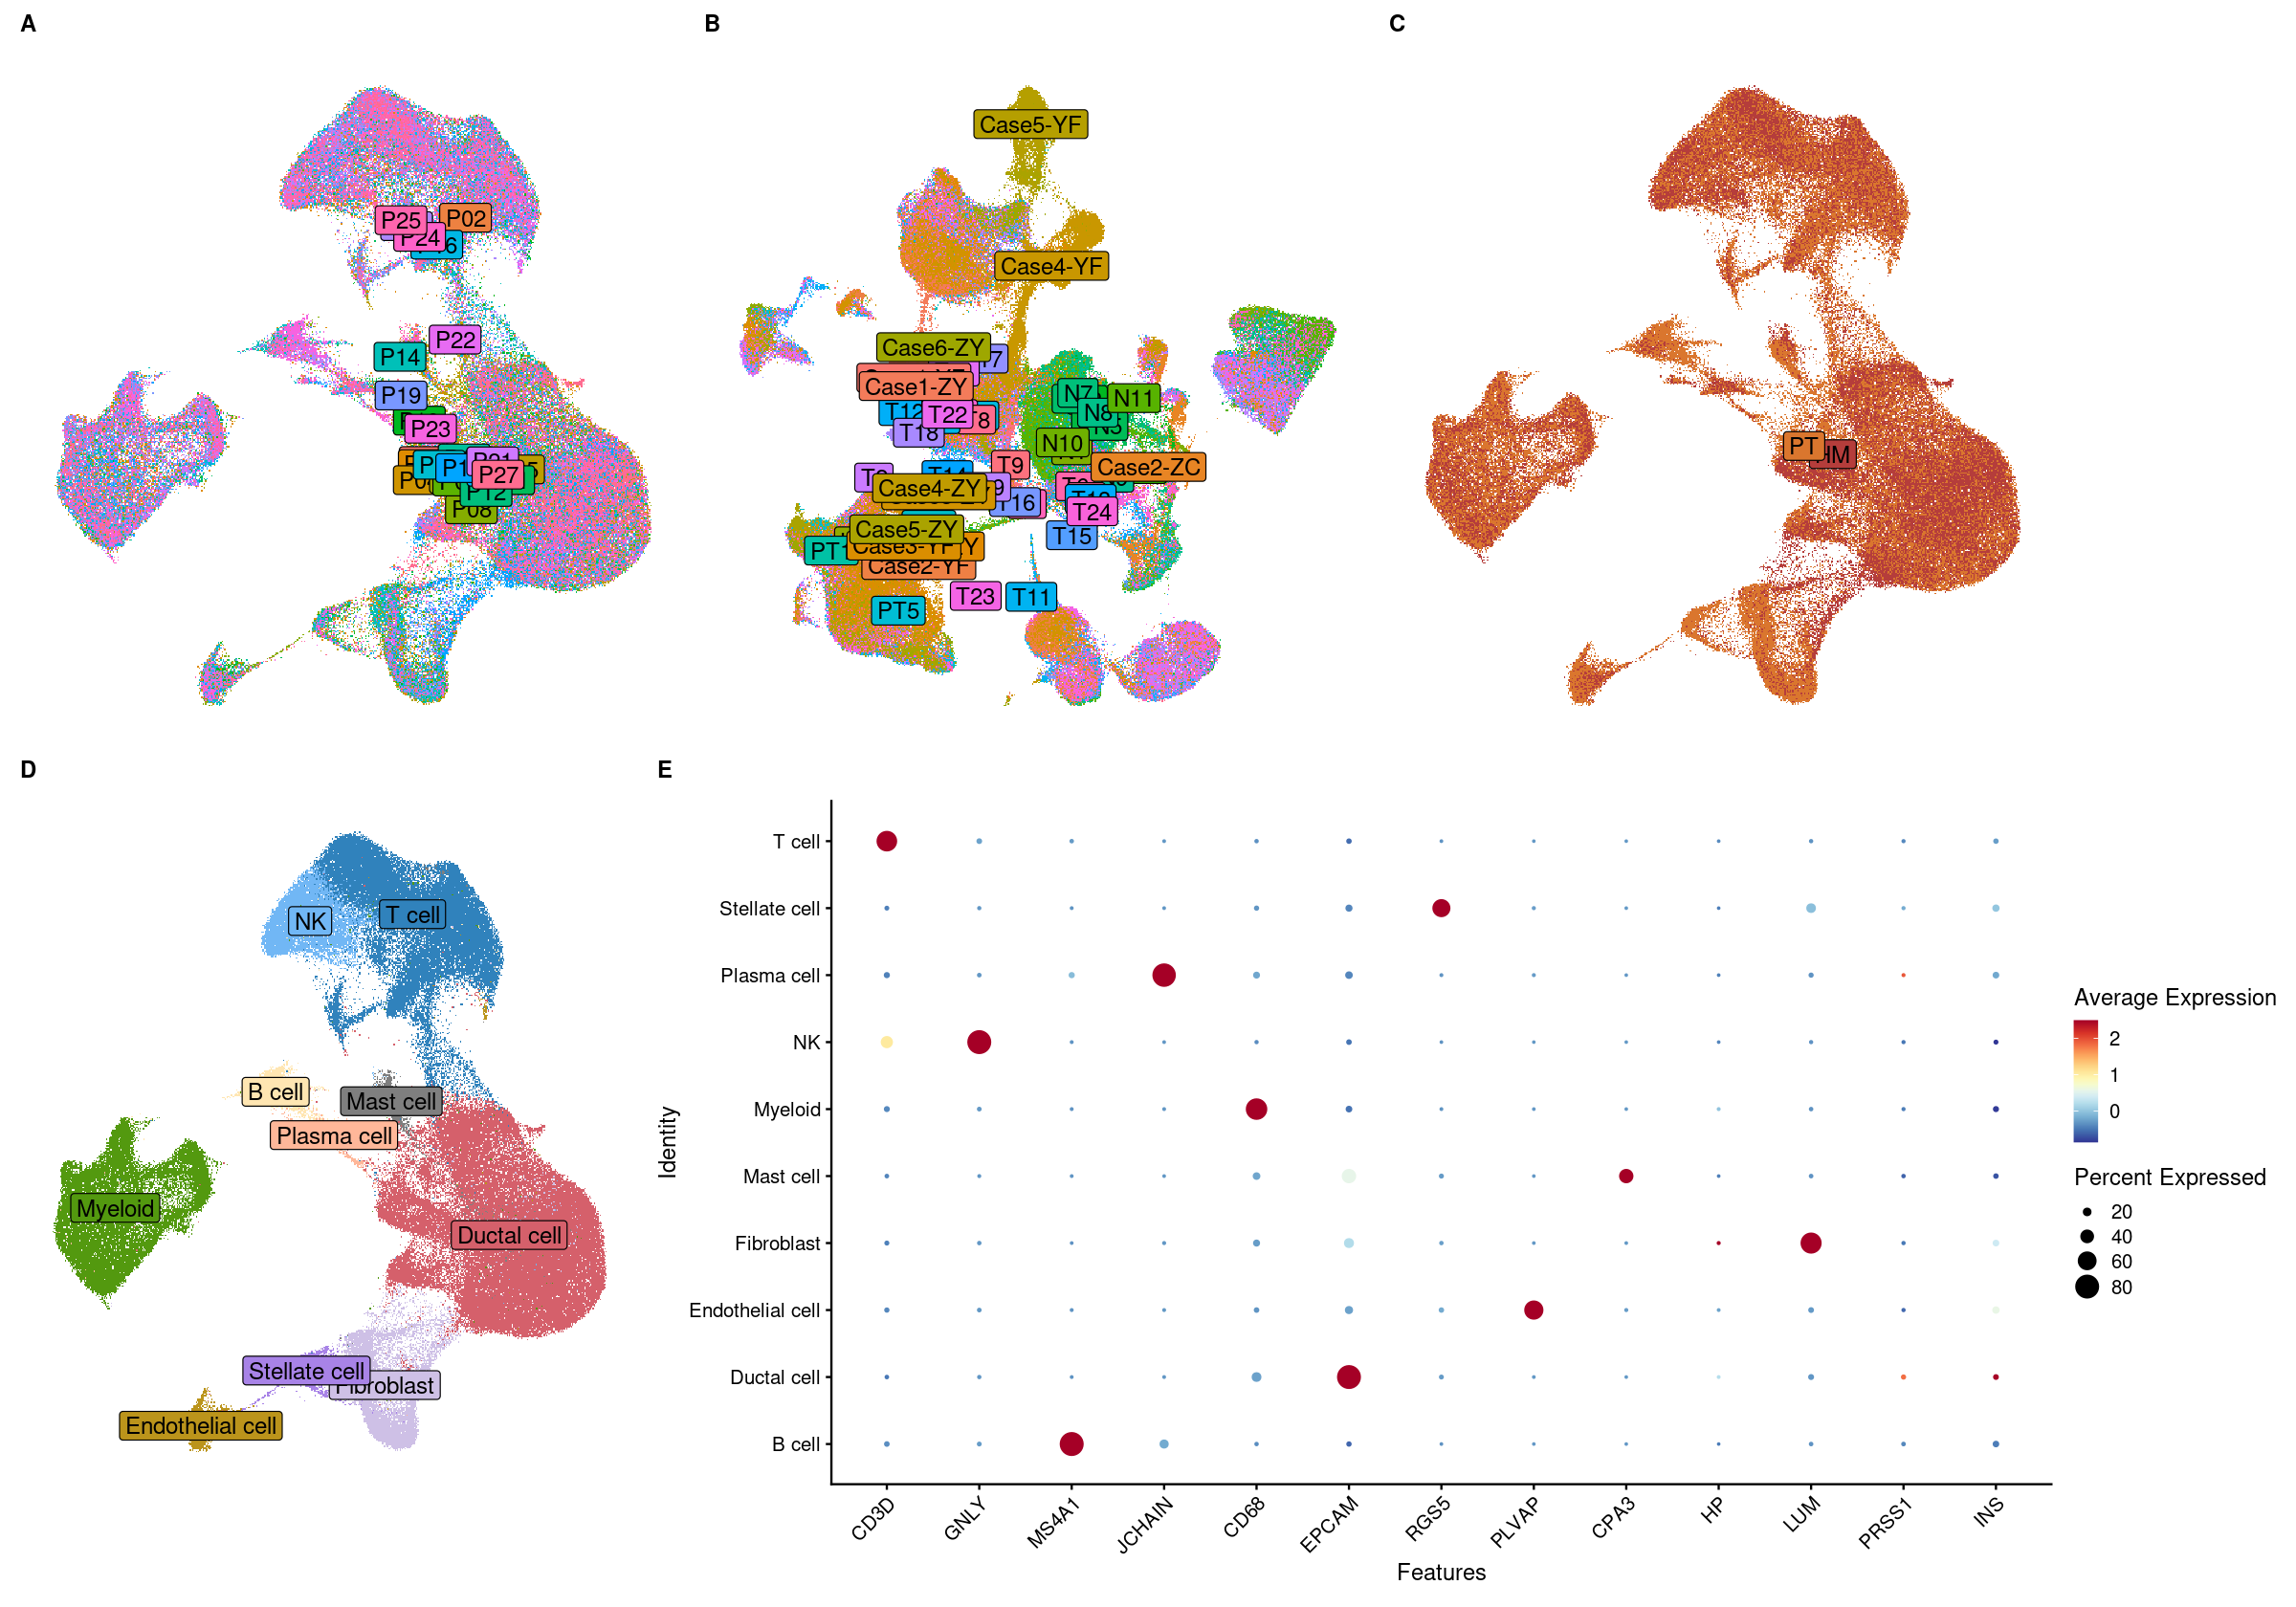

In [64]:
options(repr.plot.width=20, repr.plot.height=14)
p6 / p7  + plot_annotation(tag_levels = "A") 

pdf("/mnt/public3/chaohy/pancancer/sfig/figs1.pdf", width=20, height=14)
p6 / p7 
dev.off()

In [66]:
immune_cell <- rdsjo@meta.data %>% dplyr::filter(as.character(primary_cluster) %in% c('T cell','NK','Myeloid','B cell','Plasma cell','Mast cell')) %>% rownames()
immune_cell %>% length()
immune <- subset(rdsjo, cells=immune_cell)
DefaultAssay(immune) <- "RNA"
# saveRDS(immune, file = "./finaldata/immune.rds") 记得保存一份

[1] 119405

In [67]:
immune

An object of class Seurat 
210150 features across 119405 samples within 3 assays 
Active assay: RNA (128404 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [77]:
# /mnt/public3/chaohy/pancancer/sfig/checkpoint_genes.txt
read.table("/mnt/public3/chaohy/pancancer/sfig/checkpoint_genes.txt", sep="\t", header=F,comment.char = "") -> checkpoint_genes
checkpoint_genes %>% as.list() -> checkpoint_genes
checkpoint_genes

$V1
 [1] "ADORA2A"  "BTLA"     "BTN2A1"   "BTN2A2"   "BTN3A1"   "BTNL3"   
 [7] "BTNL9"    "C10orf54" "CD160"    "CD209"    "CD226"    "CD27"    
[13] "CD274"    "CD276"    "CD28"     "CD40"     "CD40LG"   "CD47"    
[19] "CD70"     "CD80"     "CD86"     "CD96"     "CEACAM1"  "CTLA4"   
[25] "HAVCR2"   "HLA-A"    "HLA-B"    "HLA-C"    "HLA-DMA"  "HLA-DMB" 
[31] "HLA-DOA"  "HLA-DOB"  "HLA-DPA1" "HLA-DPB1" "HLA-DQA1" "HLA-DQB1"
[37] "HLA-DRA"  "HLA-DRB1" "HLA-DRB3" "HLA-DRB4" "HLA-DRB5" "HLA-E"   
[43] "HLA-F"    "HLA-G"    "ICOS"     "ICOSLG"   "IDO1"     "KIR2DL1" 
[49] "KIR2DL2"  "KIR2DL3"  "KIR2DL4"  "KIR2DL5A" "KIR2DL5B" "KIR2DS1" 
[55] "KIR2DS2"  "KIR2DS3"  "KIR2DS4"  "KIR2DS5"  "KIR3DL1"  "KIR3DL2" 
[61] "KIR3DL3"  "KIR3DS1"  "LAG3"     "LGALS9"   "PDCD1"    "PDCD1LG2"
[67] "PVR"      "SIRPA"    "TDO2"     "TIGIT"    "TNFRSF14" "TNFRSF18"
[73] "TNFRSF4"  "TNFRSF9"  "TNFSF14"  "TNFSF18"  "TNFSF4"   "TNFSF9"  
[79] "VTCN1"

In [78]:
immune <- AddModuleScore(immune, features = checkpoint_genes, name = 'checkpoint')

Warning message:
“The following features are not present in the object: C10orf54, HLA-DQA1, HLA-DRB3, HLA-DRB4, KIR2DL2, KIR2DL5A, KIR2DL5B, KIR2DS1, KIR2DS2, KIR2DS3, KIR2DS4, KIR2DS5, KIR3DS1, not searching for symbol synonyms”


In [92]:
data <- FetchData(immune,vars = c("Course","checkpoint1"))

In [110]:
library(ggpubr)
library(rstatix)
kruskal.test(data$checkpoint1~data$Course, data=data)


	Kruskal-Wallis rank sum test

data:  data$checkpoint1 by data$Course
Kruskal-Wallis chi-squared = 673.1, df = 2, p-value < 2.2e-16


png 
  2

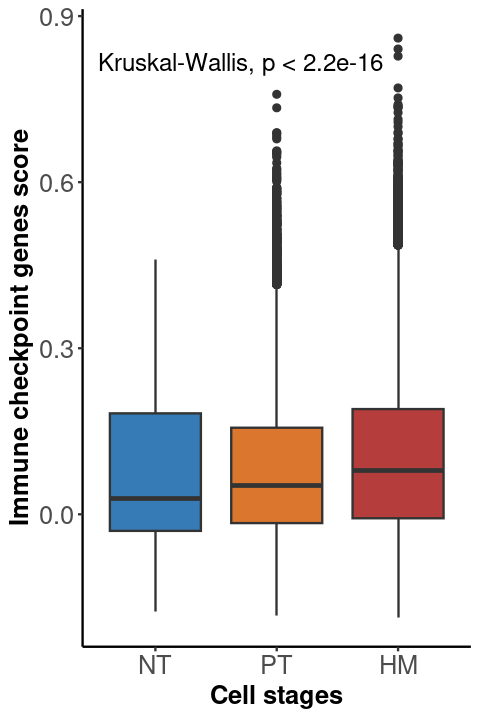

In [114]:
options(repr.plot.width=4, repr.plot.height=6)
data$Course <- factor(data$Course,levels = c("NT","PT","HM"))
p8 <- ggplot(data,aes(Course,checkpoint1, fill=Course))
p8 +geom_boxplot()+theme_bw()+RotatedAxis() +   stat_compare_means(method = "kruskal.test", #统计方法
                       aes(label = "p.format"), #显示方式
                       label.x = 1, label.y = 0.8,#位置
                       size = 5) + theme_classic() + scale_fill_manual(values = c("#367BB6","#DA762E","#B53D3B")) + theme(legend.position = "none") -> p9
# 增大坐标字体，修改y轴名称
p9 <- p9 + theme(axis.text.x = element_text(size = 15),axis.text.y = element_text(size = 15),axis.title.y = element_text(size = 15,face="bold"),axis.title.x = element_text(size = 15,face="bold")) + ylab("Immune checkpoint genes score") + xlab("Cell stages")
p9               
pdf("/mnt/public3/chaohy/pancancer/sfig/figs2.pdf", width=4, height=6)
p9
dev.off()

In [115]:
cc.genes$g2m.genes

[1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"

In [116]:
cc.genes$s.genes 

[1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"

In [118]:
saveRDS(rdsjo@meta.data, file = "/mnt/public3/chaohy/pancancer/sfig/Integreted_Dataset.rds")

In [ ]:
saveRDS(rds@meta.data, file = "/mnt/public3/chaohy/pancancer/sfig/Validation_Dataset.rds")